夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

前準備
```
brew install mecab mecab-ipadic
cd {このファイルの場所}/data/04-morpheme_analysis
mecab neko.txt > neko.txt.mecab
```

30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

mecabの出力

- 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
- EOS

In [27]:
def mor_res():
    with open('./data/04-morphological_analysis/neko.txt.mecab', 'r') as f:
        for line in f.readlines():
            col = line.split('\t')
            if len(col) != 2:
                continue
            tags = col[1].split(',')
            res = {
                'surface': col[0],
                'base': tags[6],
                'pos': tags[0],
                'pos1': tags[1]
            }
            yield res

for i, mor in enumerate(mor_res()):
    print(i, mor)
    if i == 10:
        break

0 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
1 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
2 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
3 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
4 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
5 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
6 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}
7 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
8 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}
9 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}
10 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


31. 動詞
動詞の表層形をすべて抽出せよ．


In [28]:
# generator
def verb_surfaces_gen():
    for mor in mor_res():
        if mor['pos'] == '動詞':
            yield mor['surface']

for i, mor in enumerate(verb_surfaces_gen()):
    print(mor)
    if i == 10:
        break
# list
verb_surfaces = [mor['surface'] for mor in mor_res() if mor['pos'] == '動詞']
print(verb_surfaces[:10])

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


32. 動詞の原形
動詞の原形をすべて抽出せよ．


In [29]:
# listバージョンのみ
verb_bases = [mor['base'] for mor in mor_res() if mor['pos'] == '動詞']
print(verb_bases[:10])


['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


33. サ変名詞
サ変接続の名詞をすべて抽出せよ．


In [30]:
# listバージョンのみ
sahen = [mor['base'] for mor in mor_res() if mor['pos1'] == 'サ変接続']
print(sahen[:10])


['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢']


34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．


In [31]:
def a_of_b_gen():
    state = 0
    A = ''
    for mor in mor_res():
        if state == 0:
            if mor['pos'] == '名詞':
                state = 1
                A = mor['surface']
        elif state == 1:
            if mor['surface'] == 'の':
                state = 2
            elif mor['pos'] == '名詞':
                state = 1
                A = mor['surface']
            else:
                state = 0
        elif state == 2:
            if mor['pos'] == '名詞':
                state = 0
                yield f"{A}の{mor['surface']}"
            else:
                state = 0

for i, a_of_b in enumerate(a_of_b_gen()):
    print(a_of_b)
    if i == 10:
        break


彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
何の事
肝心の母親
藁の上
笹原の中


35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [32]:
def cont_noun_gen():
    state = 0
    cont_noun = ''
    for mor in mor_res():
        if state == 0:
            if mor['pos'] == '名詞':
                state = 1
                cont_noun = mor['surface']
        elif state == 1:
            if mor['pos'] == '名詞':
                state = 2
                cont_noun += mor['surface']
            else:
                state = 0
        elif state == 2:
            if mor['pos'] == '名詞':
                state = 2
                cont_noun += mor['surface']
            else:
                state = 0        
                yield  cont_noun

for i, cont_noun in enumerate(cont_noun_gen()):
    print(cont_noun)
    if i == 10:
        break


人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍


36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．


In [33]:
word_dict = {}
for mor in mor_res():
    word_dict.setdefault(mor['base'], 0)
    word_dict[mor['base']] += 1
word_sorted = sorted(word_dict.items(), key=lambda x: -x[1])
print(word_sorted[:10])


[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337)]


37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


デフォルトでmatplotlibは日本語を表示できないので、[ここ](https://qiita.com/segavvy/items/72863888e51fabd79295)を参考にした


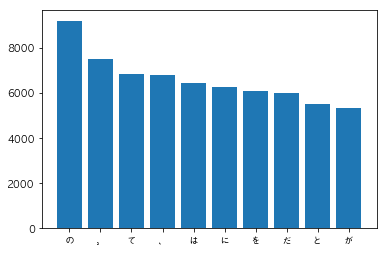

In [34]:
import matplotlib.pyplot as plt

YuGothic = '/System/Library/Assets/com_apple_MobileAsset_Font5/b29a08c200199f76b7cb065b1c5b9058cfbb65f0.asset/AssetData/YuGothic-Medium.otf'
font = {"family":"AppleGothic"}
plt.rc('font', **font)
words_10 = list(map(lambda x: x[0], word_sorted[:10]))
freqs_10 = list(map(lambda x: x[1], word_sorted[:10]))

plt.bar(range(0, 10), freqs_10, align='center')

# x軸のラベルの指定
plt.xticks(range(0, 10), words_10)
plt.show()



38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．


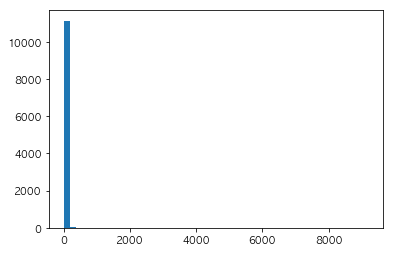

In [35]:
freqs = list(map(lambda x: x[1], word_sorted))
plt.hist(freqs, bins=50)
plt.show()


39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．


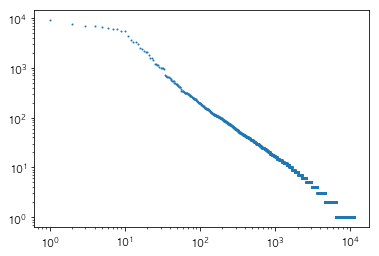

In [36]:
freq2num_type = {}
plt.scatter(range(1, len(freqs)+1), freqs, s=1)
plt.xscale('log')
plt.yscale('log')
plt.show()

